IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      19.0 -0.017497   0.006422   -0.363547   0.081920         73.0   
1      59.0  0.001886   0.007222   -0.337938   0.084899          0.0   
2       4.0 -0.062344   0.011010    0.739970   0.121924          0.0   
3      66.0 -0.066194   0.011294    0.545920   0.125094          0.0   
4      27.0 -0.020139   0.006633   -0.444672   0.083791         95.0   
...     ...       ...        ...         ...        ...          ...   
1344   46.0 -0.011309   0.011933    2.133498   0.109684         61.0   
1345   68.0 -0.035374   0.010087    1.894614   0.106370         73.0   
1346   19.0 -0.039921   0.026928    1.515434   0.168669         79.0   
1347   57.0 -0.065215   0.011451    0.509711   0.125202          0.0   
1348   46.0 -0.032960   0.020132   -0.161222   0.145491        108.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            71.0    2.710810    2.553406  0.043375  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.017497   0.006422   -0.363547   0.081920         73.0         71.0   
1     0.001886   0.007222   -0.337938   0.084899          0.0        113.0   
2    -0.062344   0.011010    0.739970   0.121924          0.0        103.0   
3    -0.066194   0.011294    0.545920   0.125094          0.0        112.0   
4    -0.020139   0.006633   -0.444672   0.083791         95.0         68.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.011309   0.011933    2.133498   0.109684         61.0         60.0   
1345 -0.035374   0.010087    1.894614   0.106370         73.0         95.0   
1346 -0.039921   0.026928    1.515434   0.168669         79.0         78.0   
1347 -0.065215   0.011451    0.509711   0.125202          0.0        105.0   
1348 -0.032960   0.020132   -0.161222   0.145491        108.0         81.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.062945   0.012493    0.250406   0.128146          0.0         71.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   12.368162    4.504785  0.020354   0.006368  ...      11135.614915   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340          3.53248          1.249511          -0.849218          3.704662   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               107.0               105.0          11.739716   

     amp2(Curr(ESC_5))  Guasto  
340            9.86971       0  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.017497   0.006422   -0.363547   0.081920         73.0         71.0   
1     0.001886   0.007222   -0.337938   0.084899          0.0        113.0   
2    -0.062344   0.011010    0.739970   0.121924          0.0        103.0   
3    -0.066194   0.011294    0.545920   0.125094          0.0        112.0   
4    -0.020139   0.006633   -0.444672   0.083791         95.0         68.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.011309   0.011933    2.133498   0.109684         61.0         60.0   
1345 -0.035374   0.010087    1.894614   0.106370         73.0         95.0   
1346 -0.039921   0.026928    1.515434   0.168669         79.0         78.0   
1347 -0.065215   0.011451    0.509711   0.125202          0.0        105.0   
1348 -0.032960   0.020132   -0.161222   0.145491        108.0         81.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.017497   0.006422   -0.363547   0.081920    73.000000    71.000000   
1     0.001886   0.007222   -0.337938   0.084899     0.000000   113.000000   
2    -0.062344   0.011010    0.739970   0.121924     0.000000   103.000000   
3    -0.066194   0.011294    0.545920   0.125094     0.000000   112.000000   
4    -0.020139   0.006633   -0.444672   0.083791    95.000000    68.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.039132   0.010140    1.771750   0.107928    94.940104    70.880208   
1619 -0.036653   0.010126    1.837405   0.106986    76.270175    97.000000   
1620 -0.135723   0.041930   -1.551010   0.245438    64.307968    85.230976   
1621 -0.121796   0.037570   -0.330274   0.228716    83.234391    61.000000   
1622 -0.020491   0.009804    2.535765   0.100980    58.437922    59.172294   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=6)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=6, score_func=<function f_regression at 0x00000225B0B69120>)
[False False False False False False False False False  True False  True
  True False False False False False False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False 

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

         Input_Features   F_Score
34           kurt(AccY)  5.316784
28          freq1(AccX)  3.505171
12          freq1(GyrY)  3.123893
11            RMS(GyrY)  2.835779
153    kurt(RPM(ESC_5))  2.803954
9             var(GyrY)  2.683149
93    freq2(RPM(ESC_1))  2.459439
92    freq1(RPM(ESC_1))  2.447428
14           amp1(GyrY)  2.371846
159    var(Curr(ESC_5))  2.261931
152     var(RPM(ESC_5))  1.989169
104      <>(RPM(ESC_2))  1.963736
8              <>(GyrY)  1.808280
78     amp1(RPM(ESC_0))  1.724489
107     RMS(RPM(ESC_2))  1.651849
22           amp1(GyrZ)  1.650429
32             <>(AccY)  1.551527
62          amp1(Pitch)  1.258449
30           amp1(AccX)  1.042470
76    freq1(RPM(ESC_0))  1.015862
17            var(GyrZ)  1.011022
4           freq1(GyrX)  1.009460
80      <>(Curr(ESC_0))  0.993558
57           var(Pitch)  0.884985
77    freq2(RPM(ESC_0))  0.880155
19            RMS(GyrZ)  0.829862
97     var(Curr(ESC_1))  0.803718
156    amp1(RPM(ESC_5))  0.760832
81     var(Cur

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      var(GyrY)  RMS(GyrY)  freq1(GyrY)  freq1(AccX)  kurt(AccY)  \
0      0.012878   0.121345   104.000000   107.000000    0.011762   
1      0.005493   0.075428   114.000000   130.000000    0.408346   
2      0.007224   0.088548    96.000000   118.000000   -0.461210   
3      0.006399   0.080834   130.000000   126.000000   -0.396723   
4      0.012662   0.120678   112.000000   133.000000    0.059594   
...         ...        ...          ...          ...         ...   
1618   0.005799   0.076821   121.829429   114.092439    0.339655   
1619   0.005903   0.077412   111.364913   123.459650    0.318632   
1620   0.009207   0.099673    91.025664   110.692032   -0.385232   
1621   0.010346   0.108677   112.062436   114.593655    1.143397   
1622   0.006570   0.081293   101.000000   101.367186    0.142439   

      kurt(RPM(ESC_5))  
0            -0.457788  
1             1.080905  
2            -0.677456  
3            -0.931296  
4            -0.391034  
...                ...  
1618    

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     var(GyrY)  RMS(GyrY)  freq1(GyrY)  freq1(AccX)  kurt(AccY)  \
340   0.006368   0.082252         89.0        107.0   -0.483684   

     kurt(RPM(ESC_5))  
340         -1.185414  


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      var(GyrY)  kurt(RPM(ESC_5))
0      0.012878         -0.457788
1      0.005493          1.080905
2      0.007224         -0.677456
3      0.006399         -0.931296
4      0.012662         -0.391034
...         ...               ...
1618   0.005799         -0.467845
1619   0.005903         -0.549863
1620   0.009207         -0.893777
1621   0.010346         -1.477381
1622   0.006570         -0.985048

[1623 rows x 2 columns]


In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     var(GyrY)  kurt(RPM(ESC_5))
340   0.006368         -1.185414


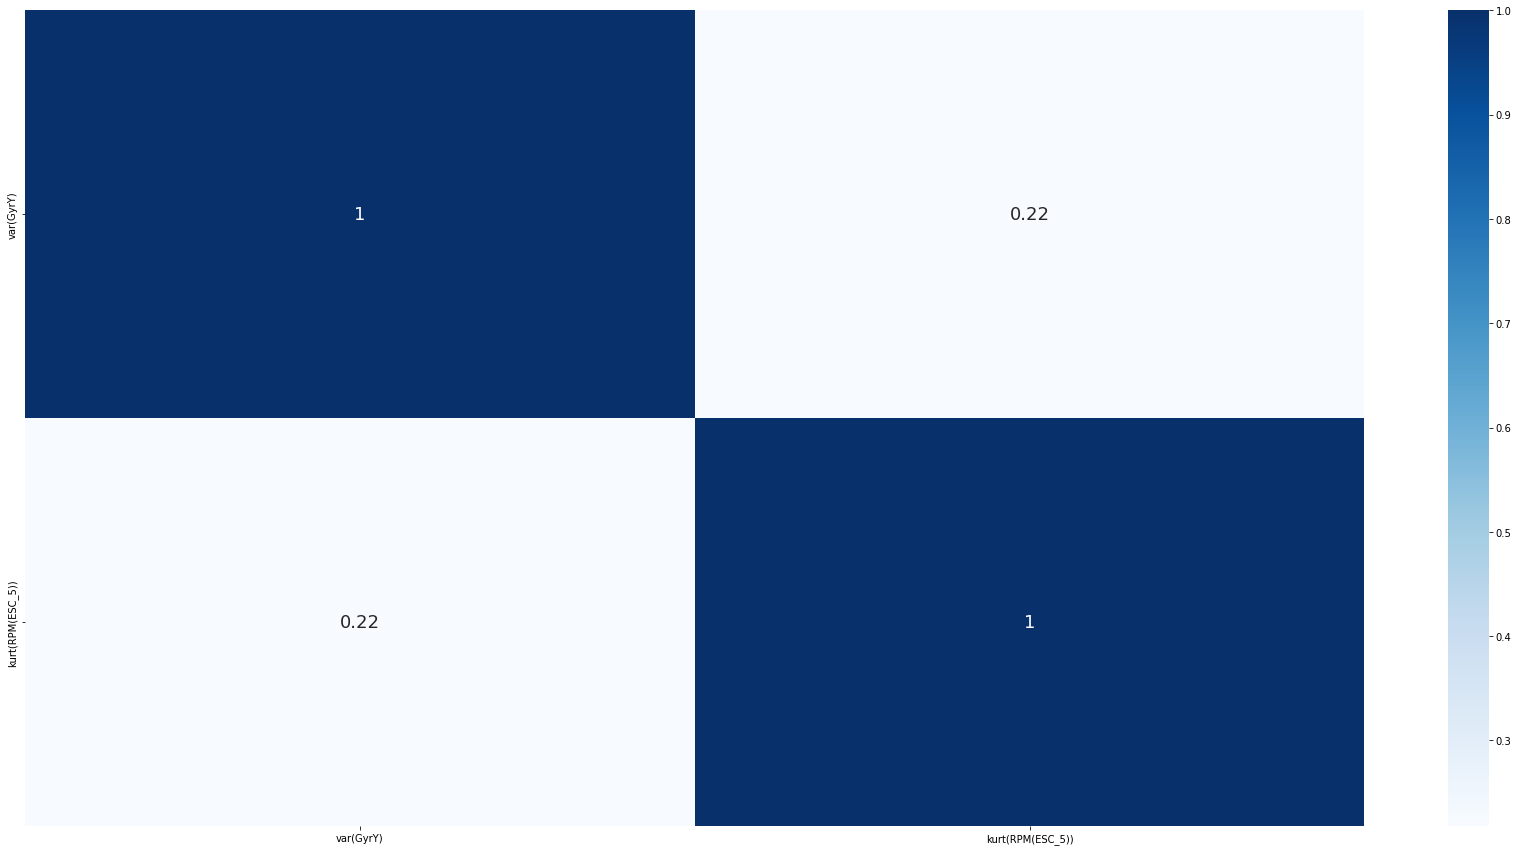

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 2)
(325, 2)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy"),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.53461538 0.56923077 0.57692308 0.58301158 0.57142857]
Accuracy: 0.58 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64


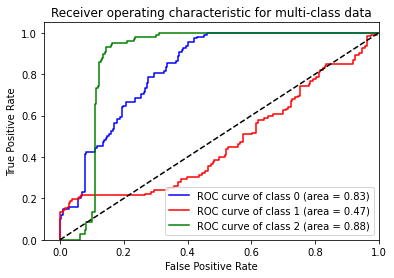

----------------------------------------------------
Cross-Validation: [0.97692308 0.98076923 0.97307692 0.99227799 0.98455598]
Accuracy: 0.97 	 ---> DecisionTreeClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


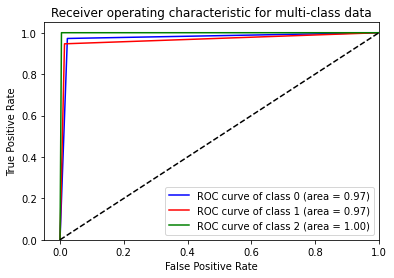

----------------------------------------------------
Cross-Validation: [0.98076923 0.99230769 0.99615385 0.996139   0.98069498]
Accuracy: 0.98 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


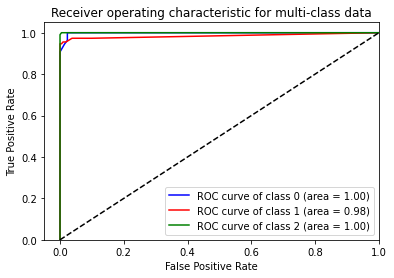

----------------------------------------------------
Cross-Validation: [0.96923077 0.99230769 0.98846154 0.996139   0.98069498]
Accuracy: 0.97 	 ---> GradientBoostingClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


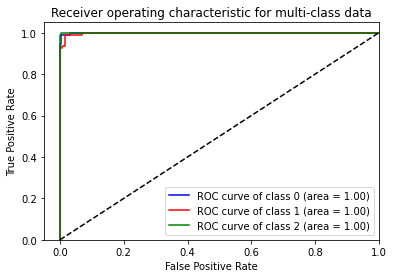

----------------------------------------------------
Cross-Validation: [0.82692308 0.87307692 0.82307692 0.78764479 0.83011583]
Accuracy: 0.82 	 ---> AdaBoostClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


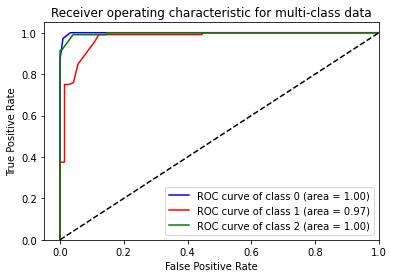

----------------------------------------------------
Cross-Validation: [0.58461538 0.54615385 0.64615385 0.5019305  0.57528958]
Accuracy: 0.58 	 ---> LinearDiscriminantAnalysis 
Test: 0    1
Name: Guasto_test, dtype: int64


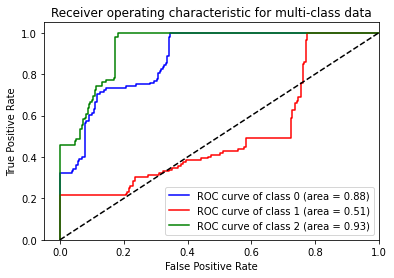

----------------------------------------------------
Cross-Validation: [0.66153846 0.69230769 0.64230769 0.66795367 0.67181467]
Accuracy: 0.65 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


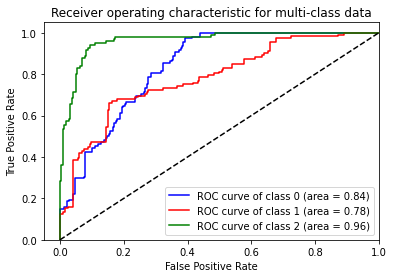

----------------------------------------------------
Cross-Validation: [0.59615385 0.64615385 0.63846154 0.65250965 0.66795367]
Accuracy: 0.67 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


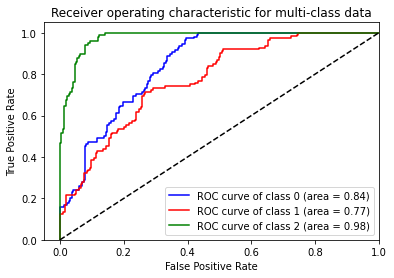

----------------------------------------------------
Cross-Validation: [0.55769231 0.58076923 0.62692308 0.64092664 0.61389961]
Accuracy: 0.55 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


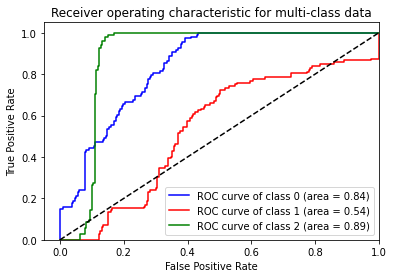

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

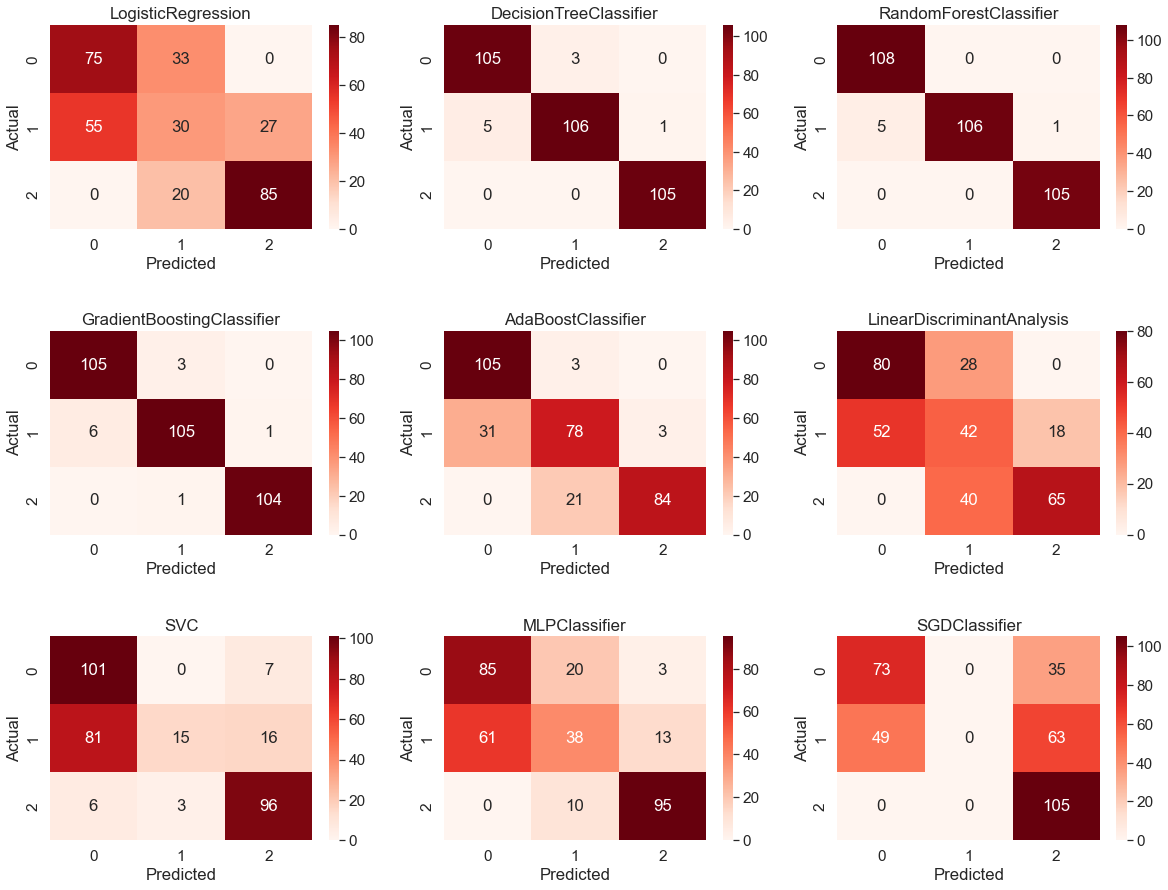

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

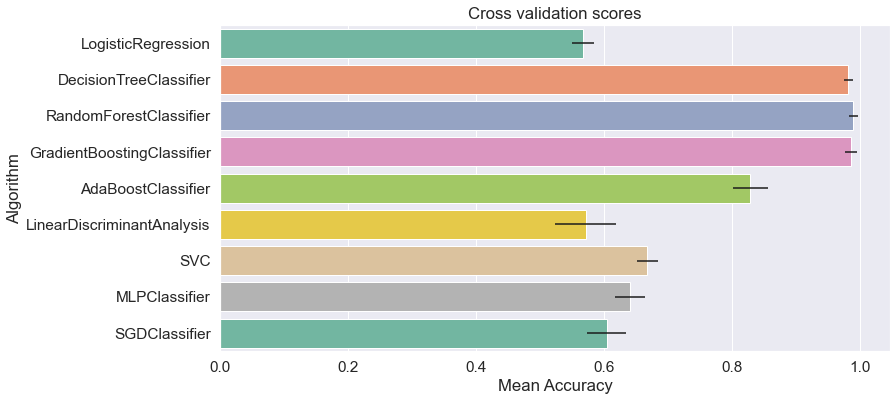

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       108
           1       0.36      0.27      0.31       112
           2       0.76      0.81      0.78       105

    accuracy                           0.58       325
   macro avg       0.57      0.59      0.57       325
weighted avg       0.56      0.58      0.57       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.97      0.95      0.96       112
           2       0.99      1.00      1.00       105

    accuracy                           0.97       325
   macro avg       0.97      0.97      0.97       325
weighted avg       0.97      0.97      0.97       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      